# Prioritizing hypothesis and A/B testing

Prioritize the hypotheses of a big online store, launch an A/B test, and analyze the results in order to help the store boost the revenue.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats as stats

hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
visits = pd.read_csv('/datasets/visits_us.csv')
orders = pd.read_csv('/datasets/orders_us.csv')

In [22]:
display(hypotheses)
display(visits)
display(orders)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [23]:
display(hypotheses.info())
display(visits.info())
display(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


None

In [24]:
visits['date'] = pd.to_datetime(visits['date'])
orders['date'] = pd.to_datetime(orders['date'])

In [25]:
visits.isnull().sum()
orders.isnull().sum()
visits.duplicated().sum()
orders.duplicated().sum()

0

The type of the data was checked and than corected, also there were no duplicates or missing values.  
Now the datasets are ready to work with.

## Prioritizing Hypotheses

In [26]:
hypotheses['ICE'] = hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Effort']
print(hypotheses[['Hypothesis','ICE']].sort_values(by = 'ICE', ascending = False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


The most promising hypotheses using the ICE formula are those with index 8,0,7 and 6.

In [27]:
hypotheses['RICE'] = hypotheses['Reach']* hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Effort']
print(hypotheses[['Hypothesis','RICE']].sort_values(by = 'RICE', ascending = False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


The results when using the RICE formula are slightly different. The most promising hypotheses are those with index 7,2,0,6,8 and 3.

The results with this two formulas are slightly different because of the reach value.This means that, for example, the fifth hypothesis with index 2 from the the ICE formula didn't have big values and normally it shouldn't be taken into account for a promising hypothesis but the reach value was so big that changed the position in the second formula. These kind of results show that these hypotheses will affect many users.
The values change from method to method but the relative position is more important here. Thus, the most promising hypotheses could be those with index 7,0 and 6. 

## A/B testing

### Graph cumulative revenue by group.

In [28]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")


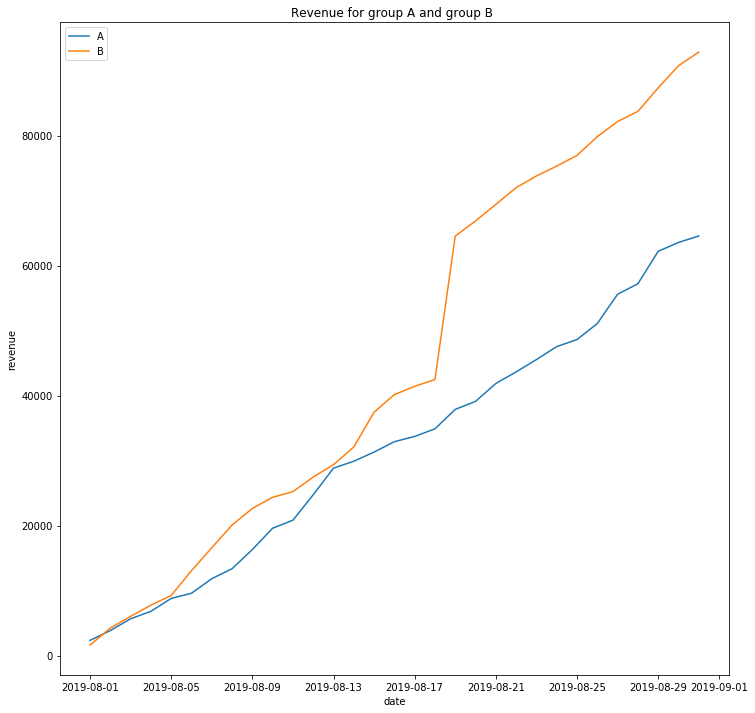

In [29]:

datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

#print(cumulativeData.head(5)) 
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() ;
plt.title('Revenue for group A and group B ');
plt.xlabel('date');
plt.ylabel('revenue');
plt.rcParams['figure.figsize'] = [12,12];

At the begining the revenue was almost identical for both groups and than slightly growing. Then the values of group B are getting way bigger than the values of group A especially from the momemt when the revenue of group B is suddenly increasing,maybe due to large expensive purchases. Thus, there are indeed positive changes on group B while group A shows a linear growth .  

### Graph cumulative average order size by group.

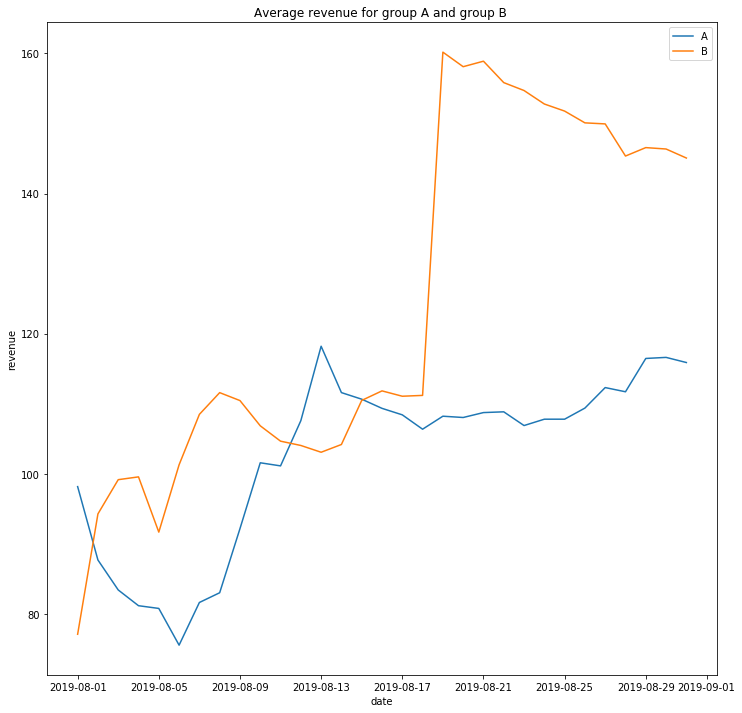

In [30]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend(); 
plt.title('Average revenue for group A and group B ');
plt.xlabel('date');
plt.ylabel('revenue');
plt.rcParams['figure.figsize'] = [12,12];


However the average values show big fluctuations on both groups.No more linear growth for group A,there is a sudden drop followed by a big growth which looks like outliers.Group B also has some spikes and again, the sudden big growth.  It's too early to make decisions based on these graphs, maybe it is better to look at the outliers before making some decisions. 

### Graph the relative difference in cumulative average order size for group B compared with group A.

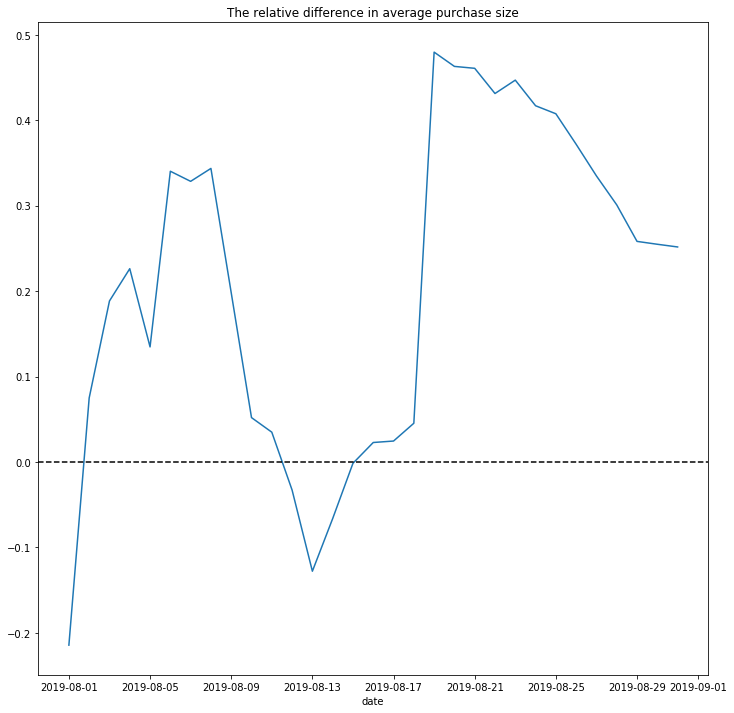

In [31]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--');
plt.title('The relative difference in average purchase size');
plt.xlabel('date');
plt.rcParams['figure.figsize'] = [12,12];


The relative difference in average purchase size graph shows some spikes which can be represented by outliers and the sudden grows which can be due to unusual big purchases.

### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference.

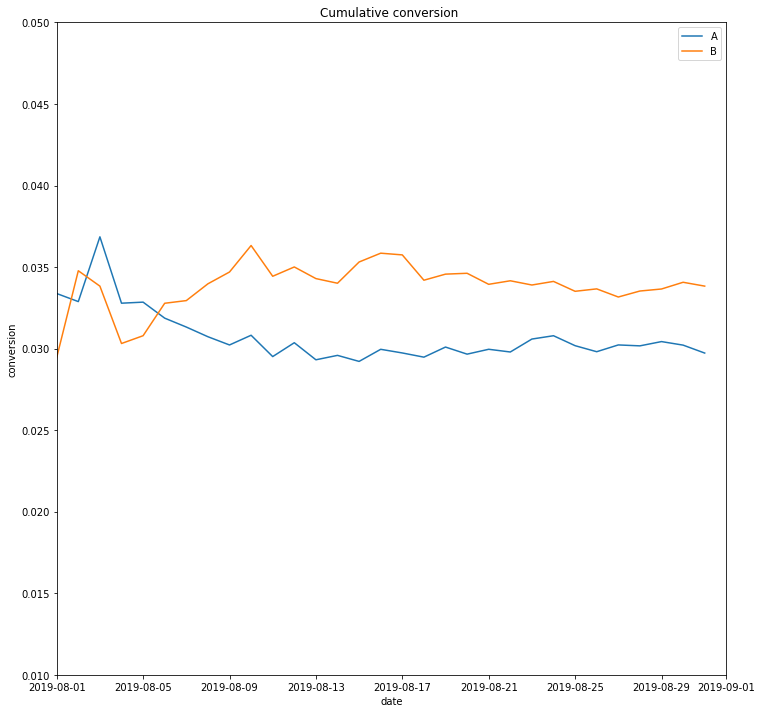

In [32]:

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis(['2019-08-01','2019-09-01',0.010,0.050]);
plt.legend();
plt.title('Cumulative conversion ');
plt.xlabel('date');
plt.ylabel('conversion');
plt.rcParams['figure.figsize'] = [12,12];


Both groups have fluctuations at the begining of the graph and than stabilised at the end. Since the fluctuation wasn't that high, from 0.3% to 0.35%, the conversion rate settled around it's average value.

### Plot a scatter chart of the number of orders per user.

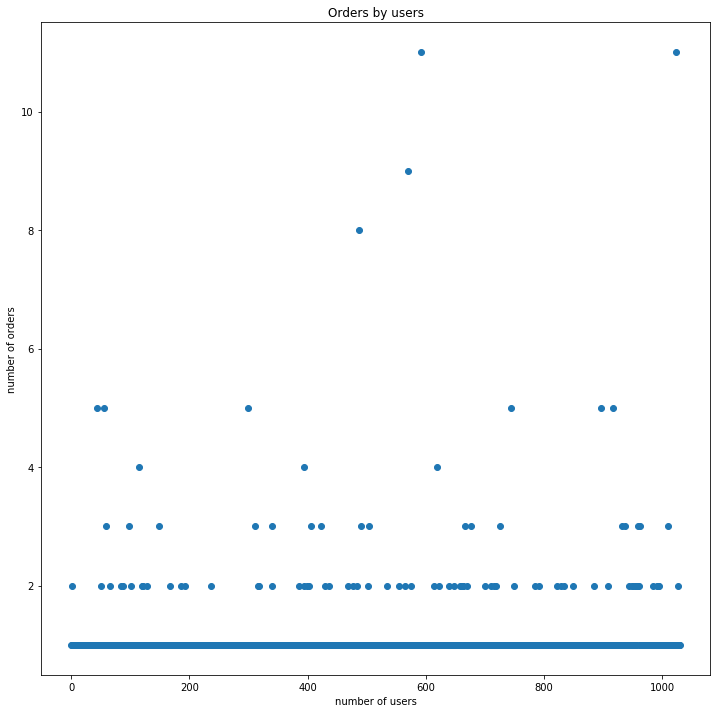

In [33]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

#print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) ;
plt.title('Orders by users');
plt.xlabel('number of users');
plt.ylabel('number of orders');

Orders bigger than two doesn't seem to be a lot in this graph so maybe should be considered outliers.

### Calculate the 95th and 99th percentiles for the number of orders per user.

[2. 4.]


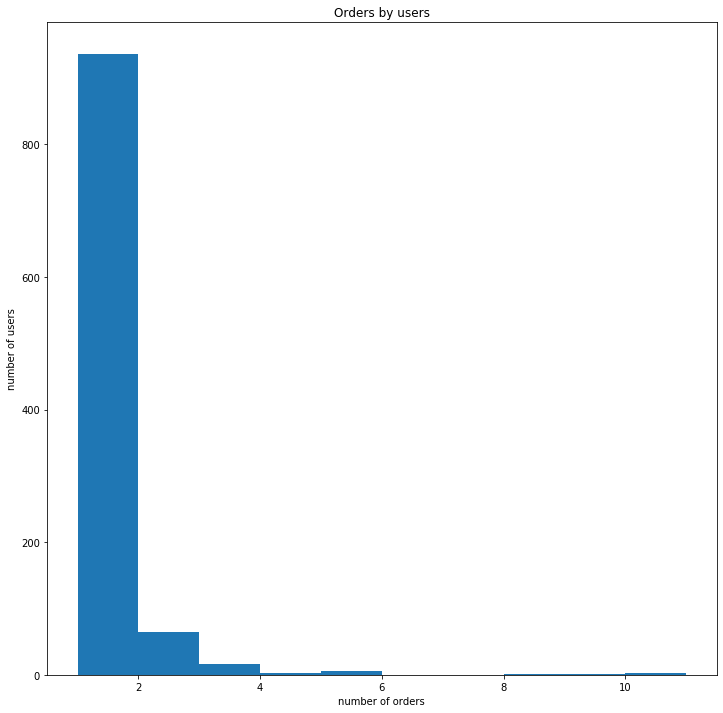

In [34]:
#print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
plt.hist(ordersByUsers['orders']) ;
print(np.percentile(ordersByUsers['orders'], [ 95, 99])) 
plt.title('Orders by users');
plt.xlabel('number of orders');
plt.ylabel('number of users');

Not more than 5% of users placed more than 2 orders and not more than 1% users placed more than 4 orders.
So two orders per user could be set as the lower limit and remove anomalies based on this results.

### Plot a scatter chart of order prices.

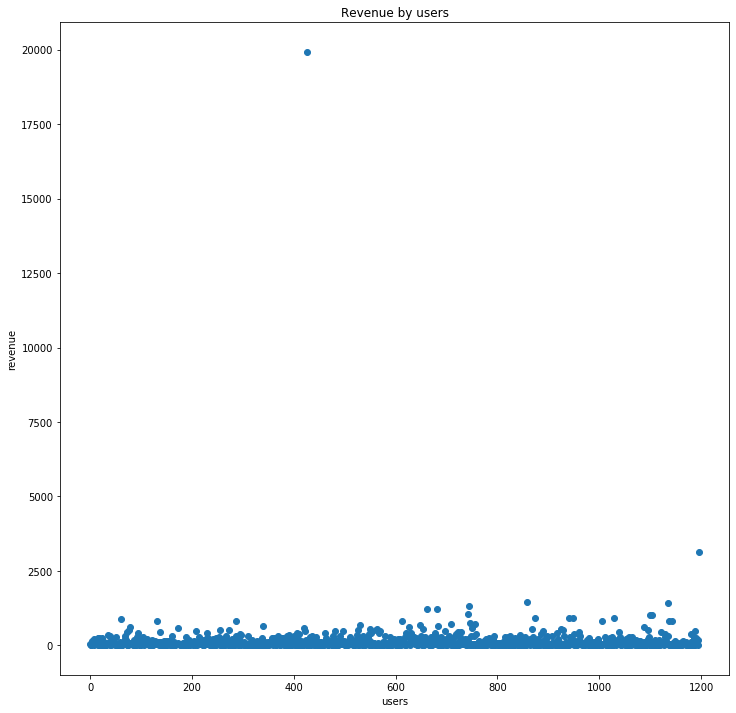

In [35]:
#print(orders.sort_values(by='revenue',ascending=False).head(10))

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.title('Revenue by users');
plt.xlabel('users');
plt.ylabel('revenue');

20000 and 2500  are the obviously outliers.

### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [36]:
print(np.percentile(orders['revenue'],[95,99]))

[435.54  900.904]


Not more than 5% of users paid more than 450 and not more than 1%users paid more than 900.
So 450$ per user could be set as the lower limit.

### Find the statistical significance of the difference in conversion between the groups using the raw data.

The hypotheses for this test are the following :
- H0: 'There is no difference in conversion between the group A and group B for the raw data'
- H1: 'There is no difference in conversion between the group A and group B for the raw data'
- Also, we set the alpha value 0.05. 

In [37]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 


0.008
0.138


p-value is 0.008 which is lower than 0.05 so we reject the null hypothesis.Thus,the raw data shows that there are statistically significant differences between the conversion rates and relative conversion gain of group B compared with group A is 13.8%.

### Find the statistical significance of the difference in average order size between the groups using the raw data.

The hypotheses for this test are the following :
- H0: 'There is no difference in average order sizes between the group A and group B for the raw data'
- H1: 'There is no difference in average order sizes between the group A and group B for the raw data'
- Also, we set the alpha value 0.05. 

In [38]:

print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


0.346
0.252


p-value is bigger than 0.05 so there are no statistically significant differences between the groups average order sizes and the relative difference is only 2.52%.

### Find the statistical significance of the difference in conversion between the groups using the filtered data. 

The hypotheses for this test are the following :
- H0: 'There is no difference in conversion between the group A and group B for the filtered data'
- H1: 'There is no difference in conversion between the group A and group B for the filtered data'
- Also, we set the alpha value 0.05. 

In [39]:

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 500]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
#print(abnormalUsers.head(5))

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 
print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.00529
0.179


For the filtered data we have the following results: 17.9% shows that group B is much better than group A and there is also a signicant difference between the conversion rates.

### Find the statistical significance of the difference in average order size between the groups using the filtered data. 

The hypotheses for this test are the following :
- H0: 'There is no difference in average order size between the group A and group B for the filtered data'
- H1: 'There is no difference in average order  size between the group A and group B for the filtered data'
- Also, we set the alpha value 0.05. 

In [40]:

print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.455
0.011


p-value increased so  the conclusions rest as they were : no statistically significant differences between the groups average order sizes. The relative difference shows a high decrease from 2.5% to 0.1%. Thus, anomalies affect A/B test results.

## Conclusions

So we have the following conclusions :
- There are statistically significant differences in conversion between the groups for both raw and filtered data;
- Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups;
- The relative difference in conversion between the groups shows that group B is better than group A for both raw and filtered data and there is an increse in percentage from raw to filtered data with 4.1%;
- The relative difference in average order size between the groups shows that group B is better than group A for both raw and filtered data but there is a decrease from 2.5% to 0.1%.

Thus, based on these facts we can stop the test, conclude that the test was succesfull and consider group B the leader.


The analysis show that the most promising hypothesis are those with index 7,0 and 6.
The revenue was not always the same, there was a big growth on the end of August for group B due to large purchases .
The average number of orders is two and also the average revenue is not higher than 450$.